# 3. lekce: Cvičení
## Závod

Uvažuj časy závodníků za ročníky půlmaratonu 2019 a 2020, které jsou uloženy v souboru [half_marathon.csv](data/half_marathon.csv). V souboru jsou uloženy pouze časy závodníků, které se zúčastnili obou závodů. V souboru je uloženo jméno závodníka, jeho čas a rok závodu, ke kterému se čas vztahuje. Tvým úkolem je spočítat, o kolik se změnil průměrný čas závodníků a zda se v průměru zlepšili či zhoršili (například protože kvůli lockdownům méně či více trénovali).

In [53]:
import pandas

df = pandas.read_csv("data/half_marathon.csv")

# Data trochu prozkoumáme
display(df.head())
print(df.shape)
print(f"Zahrnute roky: {df['Rok zavodu'].unique()}")


# Můžeme vyhodit nadbytečný sloupec
# (parametrem inplace=True změníme přímo df namísto vytvoření nového DataFramu)
df.drop('Unnamed: 0', axis=1, inplace=True)

# ... případně ho při načtení rovnou použít jako index
# df = pandas.read_csv("half_marathon.csv", index_col=0)

display(df.head())

,Unnamed: 0,Jmeno,Cas zavodnika,Rok zavodu
0,0,Eisner Tomáš,01:21:25,2019
1,1,Hofhans Tomáš,01:27:43,2019
2,2,Krs Jan,01:28:23,2019
3,3,Kasal Jan,01:29:09,2019
4,4,Bryan Lauwers,01:30:18,2019


(577, 4)
Zahrnute roky: [2019 2020]


,Jmeno,Cas zavodnika,Rok zavodu
0,Eisner Tomáš,01:21:25,2019
1,Hofhans Tomáš,01:27:43,2019
2,Krs Jan,01:28:23,2019
3,Kasal Jan,01:29:09,2019
4,Bryan Lauwers,01:30:18,2019


- Seřaď si data (je třeba seřadit data dle jména závodníka i dle roku závodu).

In [54]:
# Seřadíme podle jména a roku
# ... díky tomu máme vždy pod sebou oba ročníky daného závodníka
df = df.sort_values(["Jmeno", "Rok zavodu"])
df.head()

# (Je vidět, že data u některých závodníků přeci jen chybí)

,Jmeno,Cas zavodnika,Rok zavodu
35,Adamcová Helena,01:46:07,2019
76,Aster Vladimír,01:53:25,2019
374,Aster Vladimír,02:00:19,2020
231,Asterová Jana,02:16:59,2019
521,Asterová Jana,02:30:01,2020


- Převeď sloupec s časem závodníka na typ datetime. Můžeš využít stejný postup, jaký jsme si ukázali v lekci. Protože jde pouze o časový údaj, pandas k němu připojí dnešní datum, aby byly ve sloupci datum i čas. Toho si ale nevšímej, u obou sloupců je datum stejný, takže na porovnání údajů to nebude mít vliv.

In [55]:
# Převedeme časy na typ timedelta (pro dobu trvání, tzn. např. "2 hodiny a 50 minut")
df["Cas zavodnika"] = pandas.to_timedelta(df["Cas zavodnika"])

# ... případně by šlo použít i metodu to_datetime() (ta se ale používá pro časový okamžik, tzn. např. "20. 4. 2023 ve 12:00")
# df["Cas zavodnika"] = pandas.to_datetime(df["Cas zavodnika"])

display(df.head())

,Jmeno,Cas zavodnika,Rok zavodu
35,Adamcová Helena,0 days 01:46:07,2019
76,Aster Vladimír,0 days 01:53:25,2019
374,Aster Vladimír,0 days 02:00:19,2020
231,Asterová Jana,0 days 02:16:59,2019
521,Asterová Jana,0 days 02:30:01,2020


Pomocí metody `shift()` si dej na jeden řádek výsledky obou závodů. Je nutné ji použít v kombinaci s metodou `groupby()`, jak je vidět níže. Je třeba nahradit X vhodně zvoleným číslem.

In [56]:
df["Cas zavodnika 2020"] = df.groupby("Jmeno")["Cas zavodnika"].shift(-1)
display(df.head())

# ... shift kladný = posun hodnot "dolů"
# ... shift záporný = posun hodnot "nahoru"

# Pro ilustraci, jak by "uvnitř" asi vypadalo groupby (které nelze přímo takto zobrazit):
print("Pivot table pro ilustraci agregace/grupování:")
df.pivot_table(index=["Jmeno", "Rok zavodu"], values="Cas zavodnika")

,Jmeno,Cas zavodnika,Rok zavodu,Cas zavodnika 2020
35,Adamcová Helena,0 days 01:46:07,2019,NaT
76,Aster Vladimír,0 days 01:53:25,2019,0 days 02:00:19
374,Aster Vladimír,0 days 02:00:19,2020,NaT
231,Asterová Jana,0 days 02:16:59,2019,0 days 02:30:01
521,Asterová Jana,0 days 02:30:01,2020,NaT


Pivot table pro ilustraci agregace/grupování:


Cas zavodnika
Jmeno           Rok zavodu                
Adamcová Helena 2019       0 days 01:46:07
Aster Vladimír  2019       0 days 01:53:25
                2020       0 days 02:00:19
Asterová Jana   2019       0 days 02:16:59
                2020       0 days 02:30:01
...                                    ...
Žiška Patrik    2019       0 days 02:04:46
Žlábek Pavel    2020       0 days 01:38:47
Žákovec Jiří    2019       0 days 02:02:19
Žákovec Pavel   2019       0 days 02:03:36
                2020       0 days 02:07:37

[574 rows x 1 columns]

- Vyřaď z tabulky neúplné řádky pomocí metody `dropna()`

In [57]:
print(f"Rozměry před: {df.shape}")
df = df.dropna()
print(f"Rozměry po: {df.shape}")

df.head()

Rozměry před: (577, 4)
Rozměry po: (97, 4)


,Jmeno,Cas zavodnika,Rok zavodu,Cas zavodnika 2020
76,Aster Vladimír,0 days 01:53:25,2019,0 days 02:00:19
231,Asterová Jana,0 days 02:16:59,2019,0 days 02:30:01
101,Baborová Anna,0 days 01:58:20,2019,0 days 01:52:25
132,Bambas Jan,0 days 02:02:59,2019,0 days 02:35:39
324,Barochovská Andrea,0 days 03:01:25,2019,0 days 02:50:05


In [58]:
# Pro přehlednost si přejmenujeme sloupec s vypočítanými časy na "Cas zavodnika 2019"
df.rename(columns={"Cas zavodnika":"Cas zavodnika 2019"}, inplace=True)

# Ještě vyhodíme teď už smysl-nedávající sloupec "Rok zavodu"
# ("axis=1" říká, že chceme vyhodit sloupec, a ne řádek)
df.drop("Rok zavodu", axis=1, inplace=True)
df.head()

,Jmeno,Cas zavodnika 2019,Cas zavodnika 2020
76,Aster Vladimír,0 days 01:53:25,0 days 02:00:19
231,Asterová Jana,0 days 02:16:59,0 days 02:30:01
101,Baborová Anna,0 days 01:58:20,0 days 01:52:25
132,Bambas Jan,0 days 02:02:59,0 days 02:35:39
324,Barochovská Andrea,0 days 03:01:25,0 days 02:50:05


- Vypočítej rozdíl mezi časy závodníka a převeď ho na sekundy (postup jsme si ukazovali v lekci). Dále spočítej průměrnou změnu. Vyšlo i kladné nebo záporné číslo? A co to znamená.

In [59]:
# Spočítáme rozdíl časů
df["Zmena"] = df["Cas zavodnika 2020"] - df["Cas zavodnika 2019"]

# Převedeme na vteřiny jako číslo
df["Zmena"] = df["Zmena"].dt.total_seconds()

display(df.head())

# Jaký je význam kladné/záporné hodnoty?

,Jmeno,Cas zavodnika 2019,Cas zavodnika 2020,Zmena
76,Aster Vladimír,0 days 01:53:25,0 days 02:00:19,414.0
231,Asterová Jana,0 days 02:16:59,0 days 02:30:01,782.0
101,Baborová Anna,0 days 01:58:20,0 days 01:52:25,-355.0
132,Bambas Jan,0 days 02:02:59,0 days 02:35:39,1960.0
324,Barochovská Andrea,0 days 03:01:25,0 days 02:50:05,-680.0


### Bonus
- Rozděl pomocí funkce `cut()` závodníky na ty, kteří se zlepšili a ty, kteří se zhoršili. Jako hranice můžeš využít "mínus nekonečno" (`float("-inf")`) a "plus nekonečno" (`float("inf")`). Dále pomocí agregace zjisti počty závodníků, kteří se zlepšili a kteří se naopak zhoršili

In [60]:
# Bonus
df["Zmena Text"] = pandas.cut(df["Zmena"], bins=[float("-inf"), 0 , float("inf")], labels=["zlepsil se", "zhorsil se"])
df.head()

,Jmeno,Cas zavodnika 2019,Cas zavodnika 2020,Zmena,Zmena Text
76,Aster Vladimír,0 days 01:53:25,0 days 02:00:19,414.0,zhorsil se
231,Asterová Jana,0 days 02:16:59,0 days 02:30:01,782.0,zhorsil se
101,Baborová Anna,0 days 01:58:20,0 days 01:52:25,-355.0,zlepsil se
132,Bambas Jan,0 days 02:02:59,0 days 02:35:39,1960.0,zhorsil se
324,Barochovská Andrea,0 days 03:01:25,0 days 02:50:05,-680.0,zlepsil se


<Axes: xlabel='Meziroční změna (s)', ylabel='Četnost'>

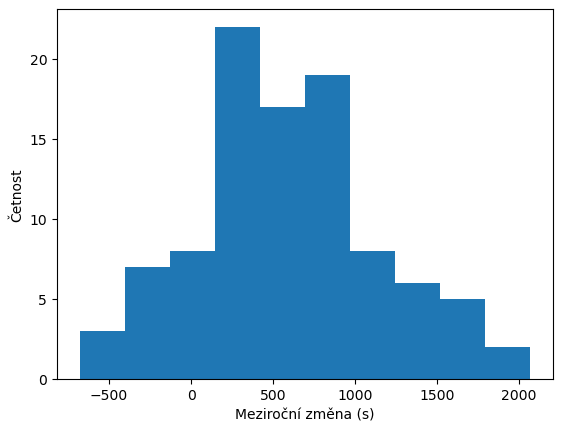

In [61]:
# Bonus 2: graf rozdělení hodnot meziroční změny
df["Zmena"].plot(kind="hist", xlabel="Meziroční změna (s)", ylabel="Četnost")